In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Customer - Sheet1.csv')
df

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


In [4]:
#read all column names and check their names
df = pd.DataFrame(df) # Converts the dictionary into a DataFrame
df.head()
column_list = list(df.columns)
column_list

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

In [5]:
#to drop columns not needed in the analysis
#inplace=True:Ensures that the operation modifies the original DataFrame (df) directly instead of creating a new one. If inplace=False or not provided, the operation would return a new DataFrame with the column removed, leaving df unchanged.
df.drop(columns="Profession", inplace=True)
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


In [6]:
# df['Age Group'] = to create a new columnn in the Dataframe (2D data structure-table eg)
#pd.cut(df['Age'] = This function is used to segment and sort data values into bins (ranges).
#It works by comparing each value in df['Age'] to the specified bins and assigning it to the corresponding bin's label. bins=[0, 18, 20, 35, 45, 60, float('inf')], labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
#include_lowest=True = Ensures that the lowest value (e.g., 0 in this case) is included in the first bin (0–18).

df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 60, float('inf')], 
                         labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                         include_lowest=True) 

In [7]:
#check for N/A values
df.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [8]:
#drop N/A in the season column 
df = df.dropna(subset=["Season"])
df

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country,Age Group
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States,Under 18
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States,18-24
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States,25-34
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States,35-44
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States,55-64
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Yes,Summer,United States,18-24
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Yes,Summer,Brazil,18-24
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Yes,Summer,United States,18-24
2003,1999,Male,22,Boots,Footwear,25,Express,Yes,Summer,Brazil,18-24


In [9]:
df.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Items Purchased        0
Category               0
Purchase Amount        0
Shipping Type          0
Subscription Status    0
Season                 0
Country                0
Age Group              0
dtype: int64

In [10]:
#check for duplicate values 
df.duplicated('CustomerID').sum()

5

In [11]:
#Specifies that duplicates will be identified only based on the CustomerID column. If multiple rows have the same CustomerID, all but the first occurrence will be dropped.
df.drop_duplicates(subset='CustomerID', inplace=True)
df.duplicated('CustomerID').sum()

0

In [12]:
df.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


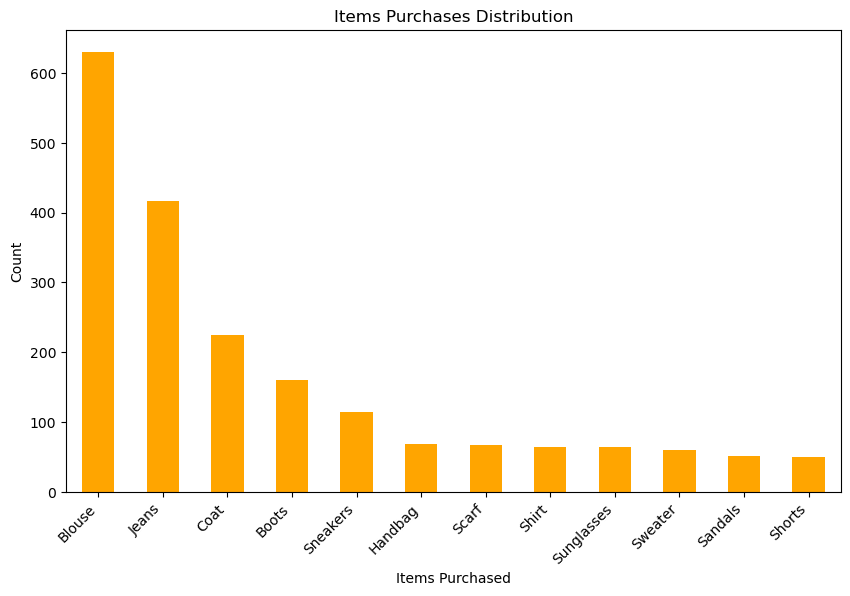

In [13]:
# Count the occurrences of items purchased
item_counts = df['Items Purchased'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='orange')

# Set the title and labels correctly
plt.title('Items Purchases Distribution')  # Corrected title assignment
plt.xlabel('Items Purchased')  # Corrected xlabel assignment
plt.ylabel('Count')  # Corrected ylabel assignment

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

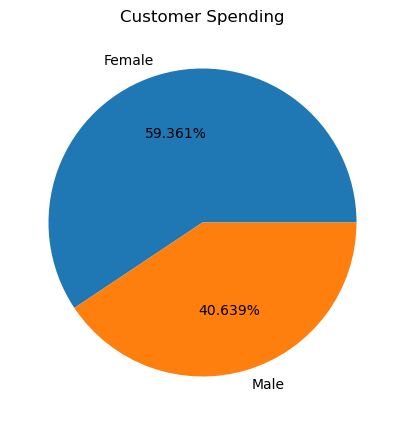

In [14]:
# Set the figure size
plt.figure(figsize=(6, 5))  # Specifies the size of the pie chart in inches.

# Create a pie chart
plt.pie(
    df['Gender'].value_counts(),  # Data: Counts of each gender
    labels=df['Gender'].value_counts().index,  # Labels: Unique gender categories
    autopct='%1.3f%%'  # Formats the percentages to 3 decimal places
)

# Set the title of the plot
plt.title('Customer Spending')  # Corrected title assignment

# Display the plot
plt.show()

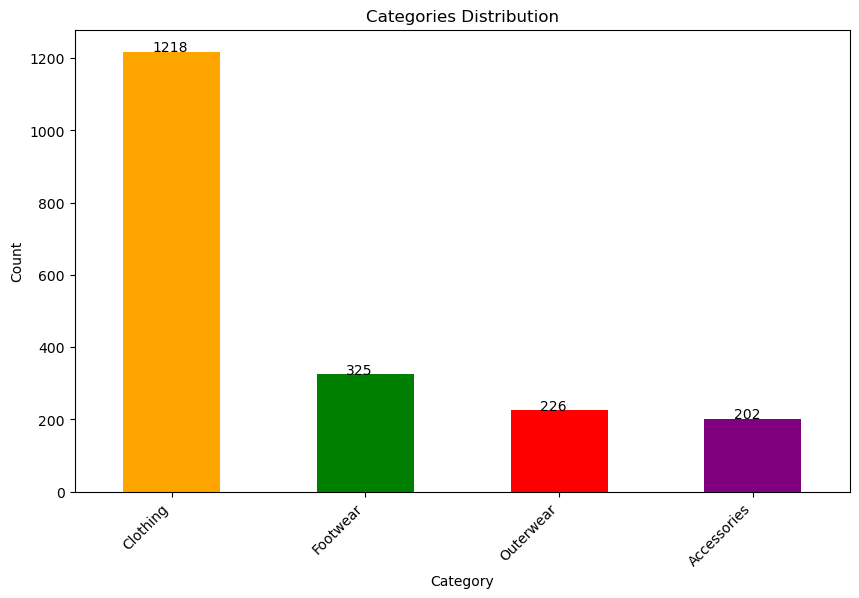

In [46]:
# Count the occurrences of items purchased
category_counts = df['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange', 'green', 'red', 'purple'][:len(item_counts)]
bars = category_counts.plot(kind='bar', color=colors)

#bar.patches: Refers to the individual bars in the bar plot. Each bar is a rectangular patch object.
#zip(bar.patches, category_counts): Combines the list of bars (bar.patches) with their respective counts (category_counts) into pairs, so we can loop over both simultaneously.
for bars, count in zip(bars.patches, category_counts):
    plt.text(bars.get_x() + bars.get_width() / 2 - 0.1, bars.get_height() + 0.29, str(count), fontsize=10)
# Set the title and labels correctly
plt.title('Categories Distribution')  # Corrected title assignment
plt.xlabel('Category')  # Corrected xlabel assignment
plt.ylabel('Count')  # Corrected ylabel assignment

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

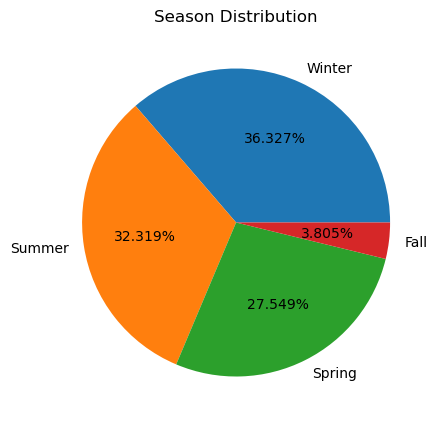

In [47]:
# Set the figure size
plt.figure(figsize=(6, 5))  # Specifies the size of the pie chart in inches.

# Create a pie chart
plt.pie(
    df['Season'].value_counts(),  # Data: Counts of each gender
    labels=df['Season'].value_counts().index,  # Labels: Unique gender categories
    autopct='%1.3f%%'  # Formats the percentages to 3 decimal places
)

# Set the title of the plot
plt.title('Season Distribution')  # Corrected title assignment

# Display the plot
plt.show()

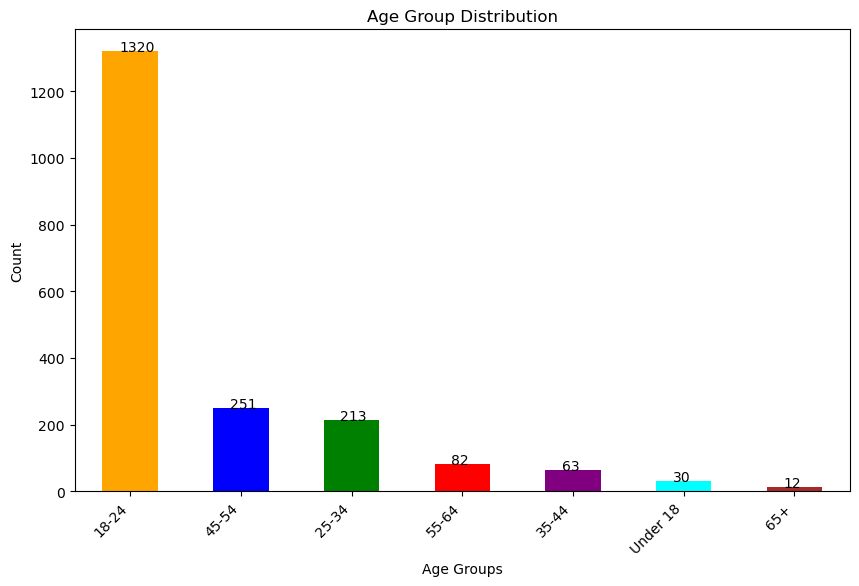

In [48]:
# Count the occurrences of items purchased
age_group_counts = df['Age Group'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
colors = ['orange', 'blue', 'green', 'red', 'purple', 'cyan', 'brown'][:len(item_counts)]
bars = age_group_counts.plot(kind='bar', color=colors)

#bar.patches: Refers to the individual bars in the bar plot. Each bar is a rectangular patch object.
#zip(bar.patches, category_counts): Combines the list of bars (bar.patches) with their respective counts (category_counts) into pairs, so we can loop over both simultaneously.
for bars, count in zip(bars.patches, age_group_counts):
    plt.text(bars.get_x() + bars.get_width() / 2 - 0.1, bars.get_height() + 0.29, str(count), fontsize=10)
# Set the title and labels correctly
plt.title('Age Group Distribution')  # Corrected title assignment
plt.xlabel('Age Groups')  # Corrected xlabel assignment
plt.ylabel('Count')  # Corrected ylabel assignment

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

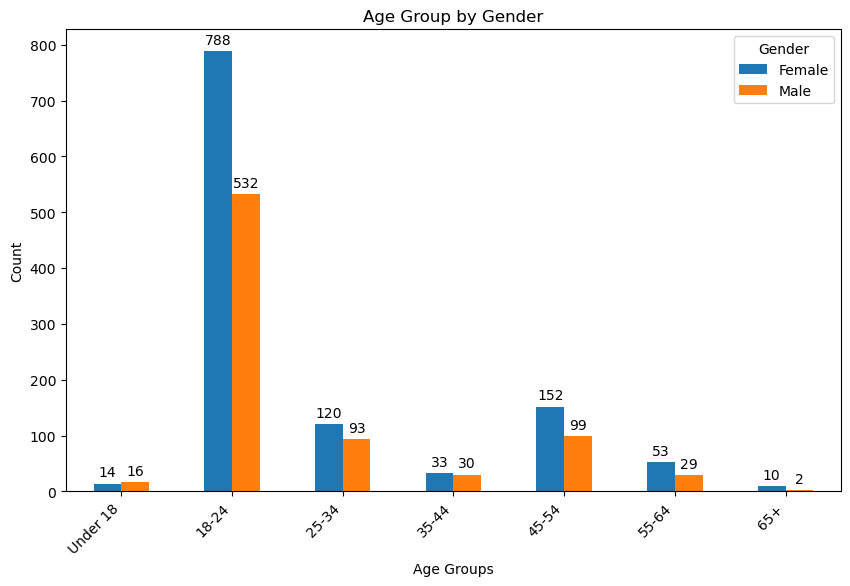

In [49]:
# Create a pivot table to summarize the data
# - Index: 'Age Group' (rows represent age groups)
# - Columns: 'Gender' (columns represent gender categories)
# - Values: Counts of individuals in each combination of Age Group and Gender
# - Fill missing values with 0
pivot_df = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)

# Plot the pivot table as a grouped bar chart
# - kind='bar': Specifies that we want a bar chart
# - figsize=(10, 6): Sets the size of the chart to 10 inches wide by 6 inches tall
ax = pivot_df.plot(kind='bar', figsize=(10, 6))

# Add text labels to each bar in the chart
for container in ax.containers:  # Iterate over each bar group (gender groups)
    ax.bar_label(container, fmt='%d', padding=3, fontsize=10)  # Add text labels on top of bars

# Add a title to the plot
ax.set_title('Age Group by Gender')

# Label the x-axis
ax.set_xlabel('Age Groups')

# Label the y-axis
ax.set_ylabel('Count')

# Add a legend with the title 'Gender'
ax.legend(title='Gender')

# Rotate the x-axis labels by 45 degrees for better readability
# ha='right': Aligns the labels to the right
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()